In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path
path = r'C:\Users\rtkel\Documents\Data Analytics Course\Instacart Basket Analysis'

In [3]:
#import prepared dataset
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged_final.pkl'))

In [4]:
#check head
ords_prods_customers_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Regularly days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Regularly busy,Slow days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
#check shape
ords_prods_customers_merged.shape

(32434211, 34)

In [6]:
#info
ords_prods_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434211 entries, 0 to 32434210
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  eval_set                object  
 12  order_number            int64   
 13  orders_day_of_week      int64   
 14  hour_of_order           int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  Unnamed: 0              int64   
 20  product_name            object  
 21  aisle_

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

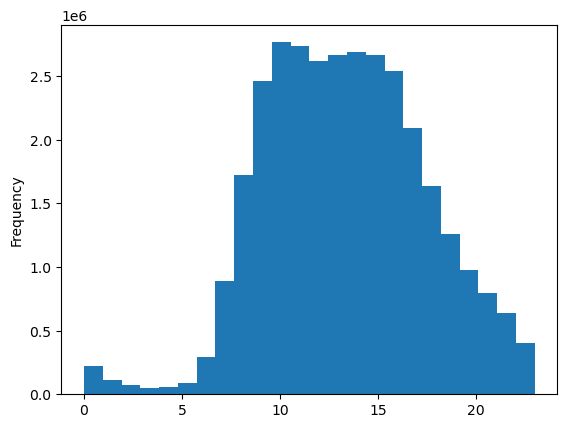

In [7]:
hour_of_order_histogram = ords_prods_customers_merged['hour_of_order'].plot.hist(bins = 24) #24hours 

The histogram indicates a gradual increase in orders beginning at 7 AM, reaching its peak at 10 AM, and maintaining a high level of activity until 4 PM. This pattern strongly suggests that the most frequent ordering occurs during the lunchtime hours.

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

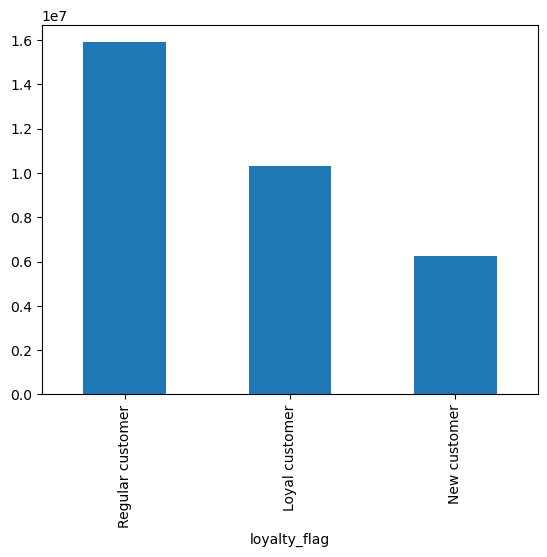

In [8]:
customer_type_bar_chart = ords_prods_customers_merged['loyalty_flag'].value_counts().plot.bar()

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
#create sample data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customers_merged)) <= 0.7

In [10]:
#define as big and small
big = ords_prods_customers_merged[dev]
small = ords_prods_customers_merged[~dev]

In [11]:
#count number of rows
len(big)+ len(small)

32434211

In [12]:
#count number of rows 
len(ords_prods_customers_merged)

32434211

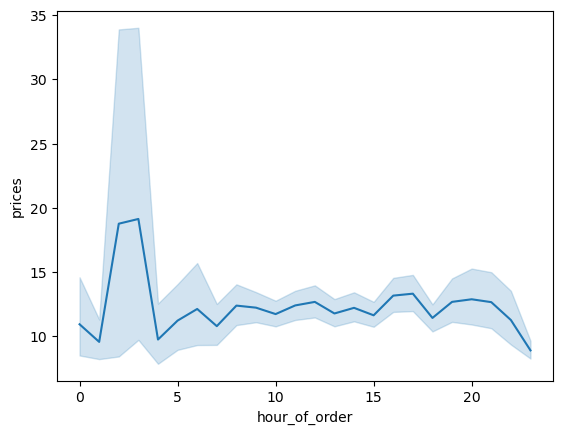

In [13]:
#plot line graph of small
hour_of_order_price_line_chart = sns.lineplot(data = small, x = 'hour_of_order',y = 'prices')

We find that during the early morning hours, more expensive products are bought.

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.


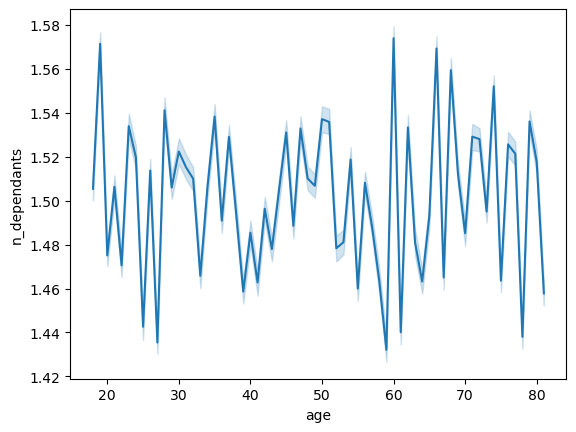

In [14]:
age_dependents_line_chart = sns.lineplot(data = small, x = 'age',y = 'n_dependants')

We find no correlation between age and number of dependents.

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

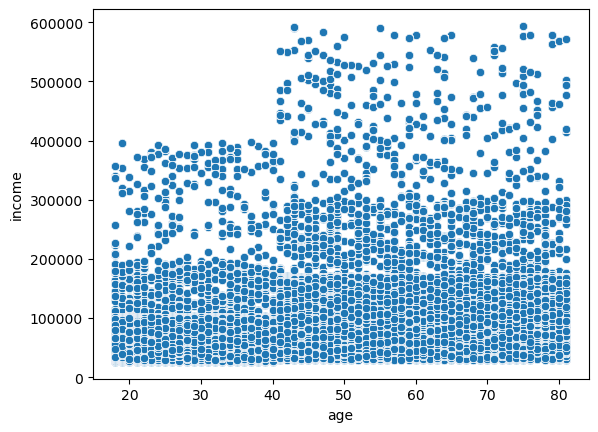

In [15]:
#create scatterplots
age_income_scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = small)

The scatterplot shows a sharp increase in very high income earners at age 40 and a greater concentration of high to middle income at the same age extending on through age 80. This indicates that the highest eaarners are customers aged 40 to 80.

In [16]:
#export
hour_of_order_histogram.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_order_histogram.png'))

In [17]:
#export
customer_type_bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_type_bar_chart.png'))

In [18]:
#export
hour_of_order_price_line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_order_price_line_chart.png'))

In [19]:
#export
age_dependents_line_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependents_line_chart.png'))

In [20]:
#export
age_income_scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter_plot.png'))